In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns

house = pd.read_csv("train.csv")

In [2]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
house.shape

(1460, 81)

In [4]:
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Let us do Cleanup

In [5]:
nullColumns = round(100* (house.isnull().sum()/len(house.Id)), 2)
nullColumns.loc[nullColumns > 0]

LotFrontage     17.74
Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64

##### Let us remove all the columns where nulls are above 80 percent. Fence, PoolQC, Misc Feature. Alley

In [6]:
columns_with_missing_values = list(nullColumns[nullColumns >= 80 ].index)
len(columns_with_missing_values)

4

##### Drop 4 columns 

In [7]:
house = house.drop(columns_with_missing_values,axis=1)

In [8]:
house.shape

(1460, 77)

#### 76 columns remain. 

In [9]:
# There are more columns with null values
missing = round(100 * (house.isnull().sum()/len(house.Id)) , 2)
CategoricalColumns = []
NumericalColumns = []
for key,val in missing.iteritems():
    if(val > 0):
        if(house[key].dtype == object):
            CategoricalColumns.append(key)
        else:
            NumericalColumns.append(key)
print(NumericalColumns)
print(CategoricalColumns)

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']


In [10]:
# for numerical columns let us fill median
for column in NumericalColumns :
    house[column] = house[column].fillna(house[column].median())

# for CategoricalColumns columns let us fill mode
for column in CategoricalColumns :
    house[column] = house[column].fillna(house[column].mode()[0])

In [11]:
# check for the presence of any more null values
house.isnull().values.any()
# Drop Id column
house = house.drop('Id',axis=1)



### Outlier treatment

In [12]:
# remove columns where variance is very less
house = house.drop(['PoolArea','MiscVal','3SsnPorch'],axis=1)

In [13]:
# IQR to remove the outlier
cols = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 
         'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
        '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
        'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
        'EnclosedPorch','ScreenPorch', 'MoSold', 'YrSold', 'SalePrice'] # one or more

Q1 = house[cols].quantile(0.05)
Q3 = house[cols].quantile(0.95)
IQR = Q3 - Q1

house = house[~((house[cols] < (Q1 - 1.5 * IQR)) |(house[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [14]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1333 entries, 0 to 1459
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1333 non-null   int64  
 1   MSZoning       1333 non-null   object 
 2   LotFrontage    1333 non-null   float64
 3   LotArea        1333 non-null   int64  
 4   Street         1333 non-null   object 
 5   LotShape       1333 non-null   object 
 6   LandContour    1333 non-null   object 
 7   Utilities      1333 non-null   object 
 8   LotConfig      1333 non-null   object 
 9   LandSlope      1333 non-null   object 
 10  Neighborhood   1333 non-null   object 
 11  Condition1     1333 non-null   object 
 12  Condition2     1333 non-null   object 
 13  BldgType       1333 non-null   object 
 14  HouseStyle     1333 non-null   object 
 15  OverallQual    1333 non-null   int64  
 16  OverallCond    1333 non-null   int64  
 17  YearBuilt      1333 non-null   int64  
 18  YearRemo

#### No more null values remain

## EDA analysis

<AxesSubplot:>

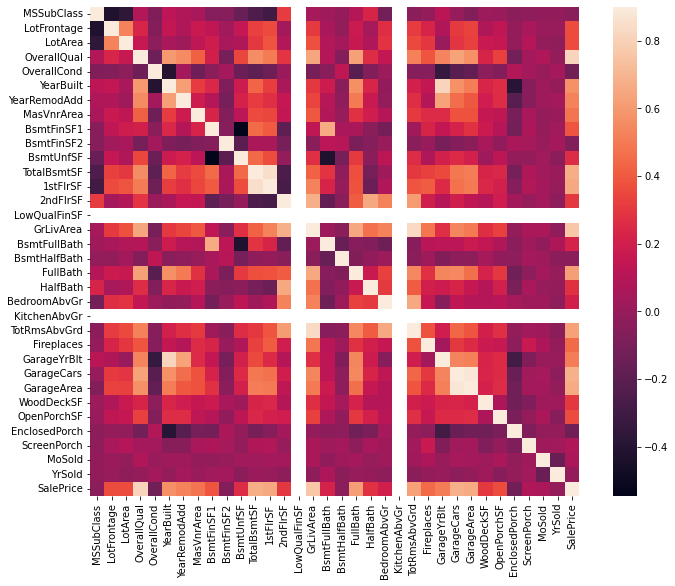

In [15]:
#Correlation map to see how features are correlated with SalePrice
corrmat = house.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

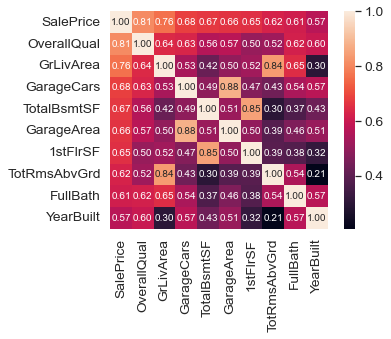

In [16]:
k = 10
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(house[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

#### We can see from the above chart that the top 10 variables are similar to what we had initially deciphered.
. OverallQual - It is obvious that having a good quality house would fetch bigger price.<br>
. Grlivarea - More the area of the floor above the ground floor, greater is the price.<br>
. Garage cars, garage area, total basement SF, 1st floor SF are highly co-related.

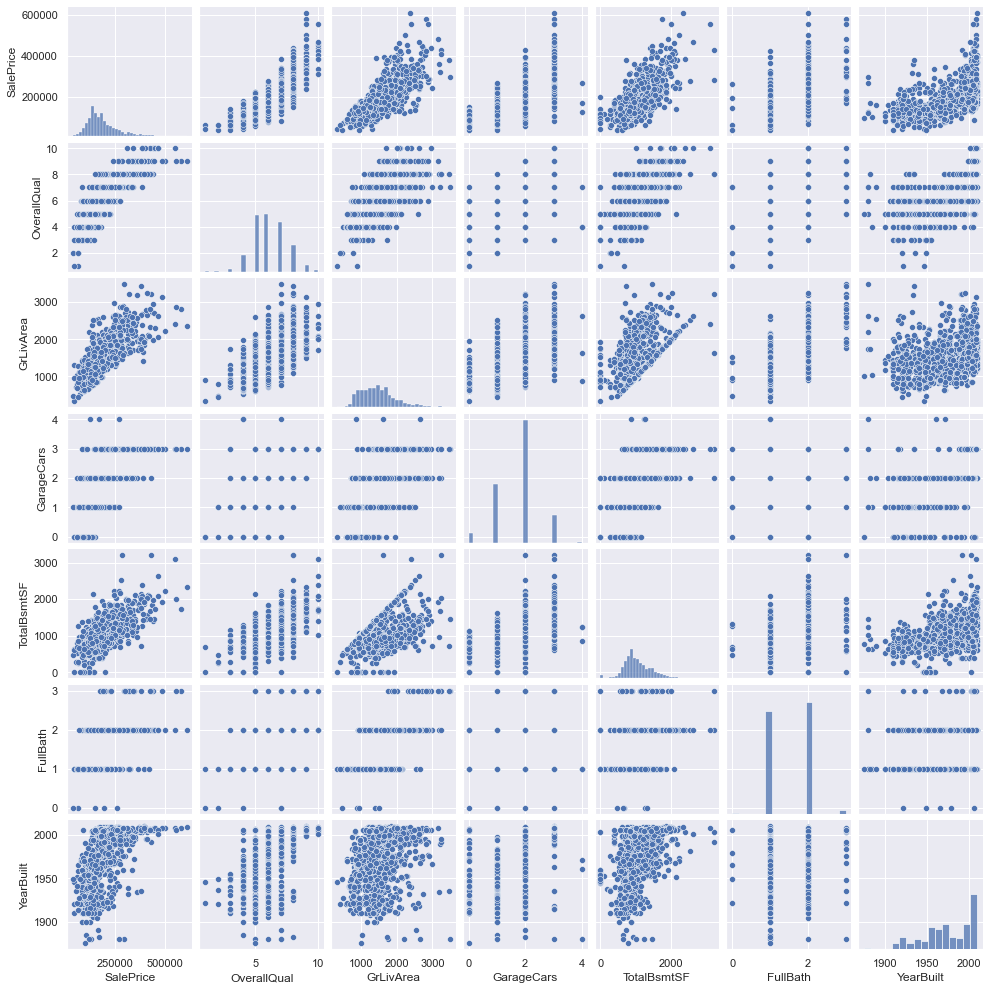

In [17]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(house[cols],height = 2)
plt.show()

In [18]:
# Convert categorical value into Dummy variable
house =pd.get_dummies(house,drop_first=True)
house.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,1,0


In [19]:
house.shape

(1333, 226)

### Splitting the data into train and test sets

In [20]:
#Split the data into train and test
y = house.pop('SalePrice')
y.head()
X = house
X.shape

(1333, 225)

In [21]:
#import train_test_split to split the data
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [23]:
print('X_train shape',X_train.shape)
print('X_test shape',X_test.shape)
print('y_train shape',y_train.shape)
print('y_test shape',y_test.shape)

X_train shape (893, 225)
X_test shape (440, 225)
y_train shape (893,)
y_test shape (440,)


In [24]:
# columns to be scaled
num_vars = X_train.select_dtypes(include=['int64','int32','float64','float32']).columns

In [25]:
X_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,...,893.000000,893.000000,893.000000,893.000000,893.000000,893.0,893.000000,893.000000,893.000000,893.000000
mean,54.048152,69.053751,9759.436730,6.106383,5.592385,1973.202688,1985.810750,103.936170,447.098544,40.530795,...,0.003359,0.001120,0.086226,0.001120,0.867861,0.0,0.004479,0.014558,0.827548,0.089586
std,41.427593,20.190944,4319.264419,1.325371,1.100157,28.810699,20.471598,174.825318,432.015255,138.048264,...,0.057896,0.033464,0.280855,0.033464,0.338831,0.0,0.066815,0.119841,0.377985,0.285747
min,20.000000,21.000000,1491.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,20.000000,60.000000,7577.000000,5.000000,5.000000,1956.000000,1968.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.000000
50%,50.000000,69.000000,9375.000000,6.000000,5.000000,1974.000000,1995.000000,0.000000,392.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.000000
75%,60.000000,78.000000,11500.000000,7.000000,6.000000,2002.000000,2004.000000,160.000000,728.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.000000
max,190.000000,182.000000,36500.000000,10.000000,9.000000,2009.000000,2010.000000,1129.000000,2188.000000,906.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


In [26]:
#Scaling using MinMax
from sklearn.preprocessing import StandardScaler,MinMaxScaler
#scaler = StandardScaler()
scaler=MinMaxScaler()

X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])

D:\Anaconda\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
D:\Anaconda\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [27]:
num_vars

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'MoSold', 'YrSold'],
      dtype='object')

In [28]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [29]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 25)             # running RFE
rfe = rfe.fit(X_train, y_train)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=25 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [30]:
#Find the top features
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 35),
 ('LotFrontage', False, 68),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 146),
 ('MasVnrArea', False, 43),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 14),
 ('BsmtUnfSF', False, 13),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 23),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 84),
 ('BsmtHalfBath', False, 161),
 ('FullBath', False, 123),
 ('HalfBath', False, 180),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', False, 25),
 ('TotRmsAbvGrd', True, 1),
 ('Fireplaces', False, 173),
 ('GarageYrBlt', False, 121),
 ('GarageCars', False, 32),
 ('GarageArea', False, 153),
 ('WoodDeckSF', False, 97),
 ('OpenPorchSF', False, 59),
 ('EnclosedPorch', False, 130),
 ('ScreenPorch', False, 39),
 ('MoSold', False, 197),
 ('YrSold', False, 167),
 ('MSZoning_FV', False, 41),
 ('MSZoning_RH', False, 45),
 ('MSZoning_RL', False, 46),

In [31]:
col = X_train.columns[rfe.support_]
col
# Extract the top features

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BedroomAbvGr',
       'TotRmsAbvGrd', 'Street_Pave', 'LandSlope_Sev', 'Condition2_PosN',
       'RoofStyle_Shed', 'RoofMatl_Metal', 'Exterior1st_CBlock',
       'Exterior1st_Stone', 'ExterQual_Gd', 'ExterQual_TA', 'Foundation_Wood',
       'Heating_OthW', 'Functional_Maj2', 'SaleType_CWD', 'SaleType_Con'],
      dtype='object')

In [32]:
X_train.columns[~rfe.support_]
# Extract the non-important features

Index(['MSSubClass', 'LotFrontage', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF2',
       'BsmtUnfSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=200)

In [33]:
#Check the shape of train and test
X_train1=X_train[col]
X_test1=X_test[col]
print(X_train1.shape)
print(X_test1.shape)
print(y_train.shape)
print(y_test.shape)

(893, 25)
(440, 25)
(893,)
(440,)


In [34]:
lm1=lm.fit(X_train, y_train)

In [35]:
# Print the coefficients and intercept
print(lm1.intercept_)
print(lm1.coef_)

1.8173844626782148e+16
[-1.52245415e+04  1.43335910e+04  3.84957184e+04  5.35424063e+04
  4.42748141e+04  3.63867937e+04  5.90947920e+03  1.78980091e+04
  9.58486709e+16  3.96887092e+16  1.02332036e+17 -1.40443711e+17
 -6.87304595e+15 -4.02928567e+15  1.03276560e+16  7.42078869e+15
  2.58900000e+03 -5.37637500e+03  1.13027500e+04  1.63887500e+03
 -3.54880000e+04  1.25538335e+15  2.86780000e+04  2.65400000e+03
 -6.40450000e+03  2.01515000e+04 -3.90400000e+03  1.09425000e+04
  1.15950000e+04  5.86950000e+03  2.25020000e+04 -3.14000000e+02
 -3.24800000e+03  3.92060000e+04  3.11727500e+04  2.54600000e+04
  1.68880000e+04  4.72685000e+04 -8.53000000e+02 -4.34975000e+03
  2.21750000e+03  1.19525000e+04 -1.22318125e+04  3.10000000e+03
 -4.67702500e+04  7.07800000e+03 -5.77893750e+03 -1.41897500e+04
 -2.79400000e+03  6.00500000e+02 -4.57730000e+04  1.37007500e+04
  6.04425000e+03 -8.29950000e+03 -2.02305000e+04 -1.19038438e+04
  6.53800000e+03 -2.16740000e+04 -1.36260000e+04 -1.49995000e+04
  

In [36]:
#import libraries for model evalution
from sklearn.metrics import r2_score, mean_squared_error

In [37]:
#r2score,RSS and RMSE
y_pred_train = rfe.predict(X_train)
y_pred_test = rfe.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.8863252235914563
0.8616425950336255
574662181156.8998
344283220950.83466
643518679.9069426
782461865.7973515


In [38]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [39]:
#list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train1, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [40]:
print(ridge_model_cv.best_params_)
print(ridge_model_cv.best_score_)

{'alpha': 2.0}
-18490.72844203396


In [41]:
alpha = 2
ridge = Ridge(alpha=alpha)
ridge.fit(X_train1, y_train)
ridge.coef_

array([ 54839.37541489, 113769.03366585,  35613.94304985,  55524.21858718,
        52655.99225933,  73640.22716514,  72899.70220162,  35538.52465263,
        86815.2830689 , -45131.14702613,  53637.36952047,  40818.00759432,
       -20324.5314421 ,  -5752.37362243,   7077.65076733,  10346.16583767,
       -22300.48617538, -24048.59583083, -50697.25201208, -62593.49723403,
        -9390.489667  , -14824.30733621, -15478.38685908, -18928.2205192 ,
        17400.2104442 ])

In [42]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train1)
y_pred_test = ridge.predict(X_test1)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8820117862023047
0.8693728612161093
596467980267.7333
325047525248.39185
667937267.9369913
738744375.5645269


In [43]:
lasso = Lasso()

# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train1, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [44]:
print(lasso_model_cv.best_params_)
print(lasso_model_cv.best_score_)

{'alpha': 10.0}
-18601.999547935644


In [45]:
alpha =10

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train1, y_train) 

Lasso(alpha=10)

In [46]:
lasso.coef_

array([ 63329.5877798 , 122194.3291806 ,  38712.9557408 ,  54453.9608642 ,
        50360.82690304,  76932.02048741,   9612.93434339,      0.        ,
       166819.75062005, -64599.53403972,  51051.95696182,  63627.14246318,
       -35057.39351563, -22090.57912273,  15386.53070193,  29319.07657648,
       -63046.25492117, -71205.17394494, -57710.52599975, -66361.83068833,
       -25660.06027111, -38514.89067058, -41854.19740881, -32745.12742804,
        26742.32642935])

In [47]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train1)
y_pred_test = lasso.predict(X_test1)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8861166763239549
0.8642180422008209
575716453981.5583
337874577724.7912
644699276.5750934
767896767.5563437


In [48]:
metric2

[0.8820117862023047,
 0.8693728612161093,
 596467980267.7333,
 325047525248.39185,
 25844.48234995221,
 27179.85238305254]

In [49]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),8.863252e-01,8.820118e-01,8.861167e-01
1,R2 Score (Test),8.616426e-01,8.693729e-01,8.642180e-01
2,RSS (Train),5.746622e+11,5.964680e+11,5.757165e+11
3,RSS (Test),3.442832e+11,3.250475e+11,3.378746e+11
4,MSE (Train),2.536767e+04,2.584448e+04,2.539093e+04
5,MSE (Test),2.797252e+04,2.717985e+04,2.771095e+04


### Model Evaluation

In [50]:
ridge_pred = ridge.predict(X_test1)

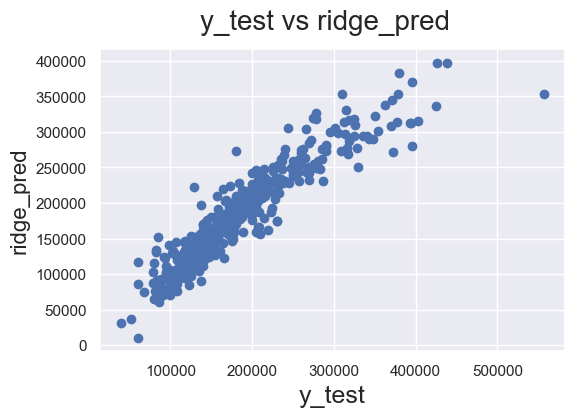

In [51]:
# Plotting y_test and y_pred to understand the spread for ridge regression.
fig = plt.figure(dpi=100)
plt.scatter(y_test,ridge_pred)
fig.suptitle('y_test vs ridge_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('ridge_pred', fontsize=16)  
plt.show()

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


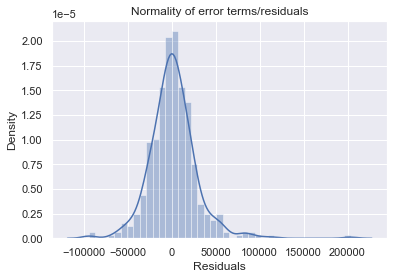

In [52]:
y_res=y_test-ridge_pred
# Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

In [53]:
lasso_pred = lasso.predict(X_test1)

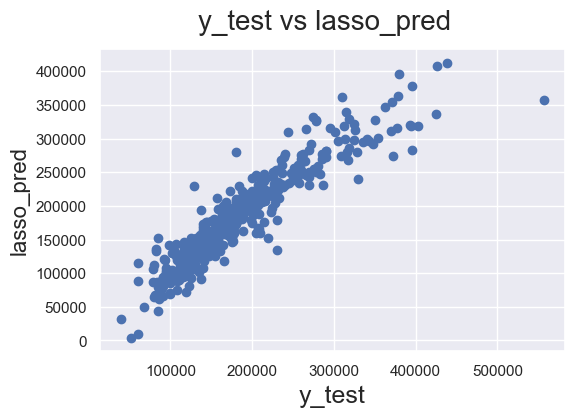

In [54]:
# Plotting y_test and y_pred to understand the spread for lasso regression.
fig = plt.figure(dpi=100)
plt.scatter(y_test,lasso_pred)
fig.suptitle('y_test vs lasso_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('lasso_pred', fontsize=16)  
plt.show()

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


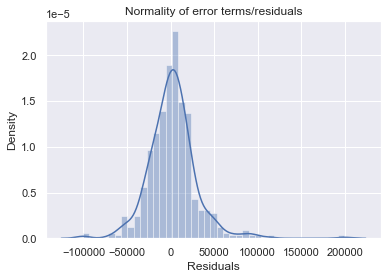

In [55]:
y_res=y_test-lasso_pred
# Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

### observe the changes in the coefficients after regularization

In [56]:
betas = pd.DataFrame(index=X_train1.columns)

In [57]:
betas.rows = X_train1.columns

C:\TEMP/ipykernel_9880/3971660649.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  betas.rows = X_train1.columns


In [58]:
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [59]:
pd.set_option('display.max_rows', None)
betas.head(68)

,Ridge,Lasso
LotArea,54839.375415,63329.587780
OverallQual,113769.033666,122194.329181
OverallCond,35613.943050,38712.955741
YearBuilt,55524.218587,54453.960864
BsmtFinSF1,52655.992259,50360.826903
TotalBsmtSF,73640.227165,76932.020487
1stFlrSF,72899.702202,9612.934343
2ndFlrSF,35538.524653,0.000000
GrLivArea,86815.283069,166819.750620
BedroomAbvGr,-45131.147026,-64599.534040


### Which variables are significant in predicting the price of a house

The below mentioned variables are significant in predicting the price

LotArea <br>
OverallQual<br>
OverallCond<br>
YearBuilt<br>
BsmtFinSF1<br>
TotalBsmtSF<br>
GrLivArea<br>
TotRmsAbvGrd<br>
Street_Pave<br>
RoofMatl_Metal<br>

### How well those variables describe the price of a house.

#### R2 score(Train) Ridge : 0.88   Lasso : 0.88
#### R2 score(Test)  Ridge  :0.869  Lasso : 0.864

In [60]:
final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),8.863252e-01,8.820118e-01,8.861167e-01
1,R2 Score (Test),8.616426e-01,8.693729e-01,8.642180e-01
2,RSS (Train),5.746622e+11,5.964680e+11,5.757165e+11
3,RSS (Test),3.442832e+11,3.250475e+11,3.378746e+11
4,MSE (Train),2.536767e+04,2.584448e+04,2.539093e+04
5,MSE (Test),2.797252e+04,2.717985e+04,2.771095e+04


## Part II

Q1

In [61]:
#Change the alpha value from 2 to 4
alpha = 4
ridge2 = Ridge(alpha=alpha)
ridge2.fit(X_train1, y_train)

Ridge(alpha=2)

In [62]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge2.predict(X_train1)
y_pred_test = ridge2.predict(X_test1)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8820117862023047
0.8693728612161093
596467980267.7333
325047525248.39185
667937267.9369913
738744375.5645269


#### R2score on training data has slightly decreased but it has increased on testing data 

In [63]:
#Changed alpha 10 to 20
alpha =20
lasso20 = Lasso(alpha=alpha)
lasso20.fit(X_train1, y_train) 

Lasso(alpha=40)

In [64]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso20.predict(X_train1)
y_pred_test = lasso20.predict(X_test1)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8838051194678322
0.8688087572349533
587402109733.6624
326451219800.4165
657785117.2829366
741934590.455492


#### R2score on training data has slightly decreased but it has slightly increased on testing data 

In [65]:
#important predictor variables
betas = pd.DataFrame(index=X_train1.columns)
betas.rows = X_train1.columns
betas['Ridge4'] = ridge2.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
betas['Lasso20'] = lasso20.coef_
pd.set_option('display.max_rows', None)
betas.head(68)

C:\TEMP/ipykernel_9880/691802247.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  betas.rows = X_train1.columns


,Ridge2,Ridge,Lasso,Lasso40
LotArea,54839.375415,54839.375415,63329.587780,60864.769946
OverallQual,113769.033666,113769.033666,122194.329181,126540.006112
OverallCond,35613.943050,35613.943050,38712.955741,37677.247124
YearBuilt,55524.218587,55524.218587,54453.960864,54346.266595
BsmtFinSF1,52655.992259,52655.992259,50360.826903,50831.533722
TotalBsmtSF,73640.227165,73640.227165,76932.020487,77102.914854
1stFlrSF,72899.702202,72899.702202,9612.934343,8902.918331
2ndFlrSF,35538.524653,35538.524653,0.000000,0.000000
GrLivArea,86815.283069,86815.283069,166819.750620,161808.637652
BedroomAbvGr,-45131.147026,-45131.147026,-64599.534040,-56728.157408


The r2_score of ridge is slightly higher than ridge for the test dataset so we will choose ridge regression to solve this problem

Q3

In [66]:
X_train1

,LotArea,OverallQual,OverallCond,YearBuilt,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BedroomAbvGr,...,RoofMatl_Metal,Exterior1st_CBlock,Exterior1st_Stone,ExterQual_Gd,ExterQual_TA,Foundation_Wood,Heating_OthW,Functional_Maj2,SaleType_CWD,SaleType_Con
1108,0.187723,0.555556,0.500,0.932836,0.000000,0.288210,0.170306,0.460583,0.407819,0.500000,...,0,0,0,0,1,0,0,0,0,0
745,0.213431,0.777778,1.000,0.753731,0.262797,0.356207,0.252911,0.955928,0.753286,0.666667,...,0,0,0,0,0,0,0,0,0,0
1134,0.208004,0.555556,0.500,0.910448,0.000000,0.285714,0.158661,0.424581,0.377486,0.500000,...,0,0,0,0,1,0,0,0,0,0
512,0.217344,0.444444,0.500,0.619403,0.238117,0.269495,0.139738,0.000000,0.129424,0.500000,...,0,0,0,0,1,0,0,0,0,0
43,0.220201,0.444444,0.625,0.746269,0.127971,0.292576,0.166667,0.000000,0.154365,0.500000,...,0,0,0,0,1,0,0,0,0,0
33,0.258819,0.444444,0.500,0.626866,0.465265,0.436057,0.443959,0.000000,0.411190,0.666667,...,0,0,0,0,1,0,0,0,0,0
269,0.183553,0.555556,0.750,0.753731,0.343236,0.356519,0.230349,0.000000,0.213347,0.500000,...,0,0,0,0,1,0,0,0,0,0
789,0.306036,0.555556,0.875,0.679104,0.259598,0.259513,0.180495,0.689634,0.541625,0.833333,...,0,0,0,0,1,0,0,0,0,0
1038,0.001200,0.333333,0.625,0.708955,0.000000,0.170306,0.115721,0.338920,0.291203,0.500000,...,0,0,0,0,1,0,0,0,0,0
151,0.354195,0.777778,0.500,0.985075,0.639854,0.533375,0.447598,0.000000,0.414560,0.333333,...,0,0,0,1,0,0,0,0,0,0


LotArea,OverallQual,YearBuilt,BsmtFinSF1,TotalBsmtSF are the top 5 important predictors.

In [67]:
X_train2 = X_train1.drop(['LotArea','OverallQual','YearBuilt','BsmtFinSF1','TotalBsmtSF'],axis=1)
X_test2 = X_test1.drop(['LotArea','OverallQual','YearBuilt','BsmtFinSF1','TotalBsmtSF'],axis=1)

In [68]:
X_train2.head()

,OverallCond,1stFlrSF,2ndFlrSF,GrLivArea,BedroomAbvGr,TotRmsAbvGrd,Street_Pave,LandSlope_Sev,Condition2_PosN,RoofStyle_Shed,RoofMatl_Metal,Exterior1st_CBlock,Exterior1st_Stone,ExterQual_Gd,ExterQual_TA,Foundation_Wood,Heating_OthW,Functional_Maj2,SaleType_CWD,SaleType_Con
1108,0.500,0.170306,0.460583,0.407819,0.500000,0.444444,1,0,0,0,0,0,0,0,1,0,0,0,0,0
745,1.000,0.252911,0.955928,0.753286,0.666667,0.888889,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1134,0.500,0.158661,0.424581,0.377486,0.500000,0.444444,1,0,0,0,0,0,0,0,1,0,0,0,0,0
512,0.500,0.139738,0.000000,0.129424,0.500000,0.222222,1,0,0,0,0,0,0,0,1,0,0,0,0,0
43,0.625,0.166667,0.000000,0.154365,0.500000,0.222222,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [69]:
# alpha 10 
alpha =10
lasso21 = Lasso(alpha=alpha)
lasso21.fit(X_train2, y_train) 

Lasso(alpha=10)

In [70]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso21.predict(X_train2)
y_pred_test = lasso21.predict(X_test2)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.7950442479593132
0.7628532029598877
1036116570707.427
590106927366.7456
1160264916.8056293
1341152107.6516945


In [71]:
#important predictor variables
betas = pd.DataFrame(index=X_train2.columns)
betas.rows = X_train1.columns
betas['Lasso21'] = lasso21.coef_
pd.set_option('display.max_rows', None)
betas.head(68)

C:\TEMP/ipykernel_9880/3989665536.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  betas.rows = X_train1.columns


,Lasso21
OverallCond,14564.898917
1stFlrSF,171938.791373
2ndFlrSF,15471.050931
GrLivArea,187754.607922
BedroomAbvGr,-73055.630093
TotRmsAbvGrd,42246.772627
Street_Pave,101652.746105
LandSlope_Sev,-65846.649018
Condition2_PosN,0.000000
RoofStyle_Shed,78597.695496


five most important predictor variables :

    GrLivArea
    1stFlrSF 
    RoofMatl_Metal
    Street_Pave
    RoofStyle_Shed